In [81]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kohtaasakura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kohtaasakura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
df = pd.read_csv('data/all-data.csv', encoding='latin_1', header=None)
df

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [51]:
df.columns = ['sentiment', 'news_title']

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   4846 non-null   object
 1   news_title  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [53]:
df.isnull().values.any()

False

In [54]:
def clean_text(text):
    # Step 1: Convert text to lowercase
    text = text.lower()
    
    # Step 2: Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Step 3: Tokenization (split text into words)
    tokens = word_tokenize(text)
    
    # Step 4: Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Step 5: Join tokens back into cleaned text
    cleaned_text = " ".join(filtered_tokens)
    
    return cleaned_text

In [55]:
df['news_title'] = df['news_title'].apply(clean_text)

In [56]:
df

,sentiment,news_title
0,neutral,according gran company plans move production r...
1,neutral,technopolis plans develop stages area less squ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy years baswa...
...,...,...
4841,negative,london marketwatch share prices ended lower lo...
4842,neutral,rinkuskiai beer sales fell per cent million li...
4843,negative,operating profit fell eur mn eur mn including ...
4844,negative,net sales paper segment decreased eur mn secon...


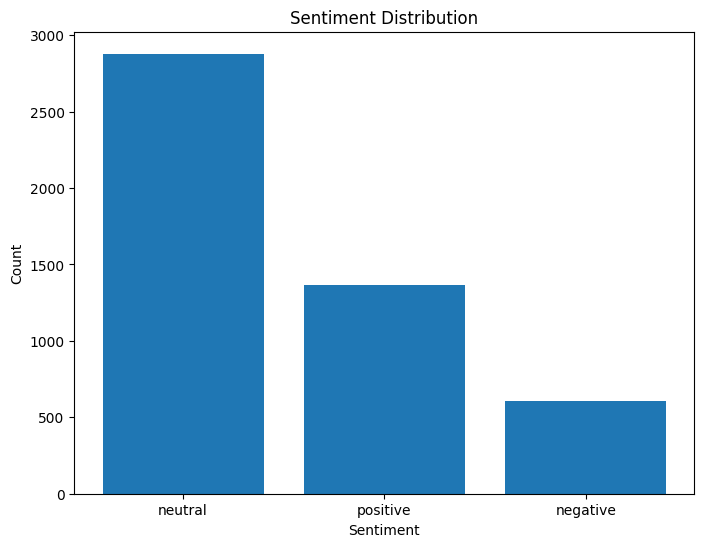

In [57]:
# Create a bar chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/financialnewssentiment-OsNV2T2z-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/financialnewssentiment-OsNV2T2z-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/financialnewssentiment-OsNV2T2z-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtyp

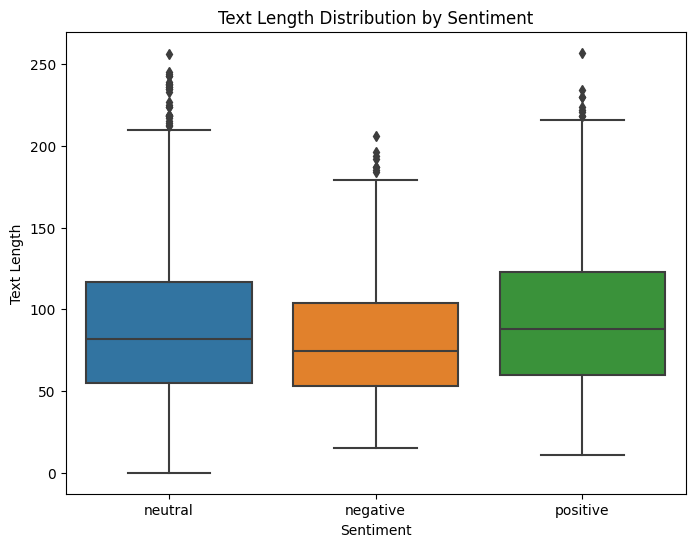

In [58]:
# Calculate text length for each sample
df['text_length'] = df['news_title'].apply(len)

# Create box plots to visualize text length by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='text_length')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.title('Text Length Distribution by Sentiment')
plt.show()

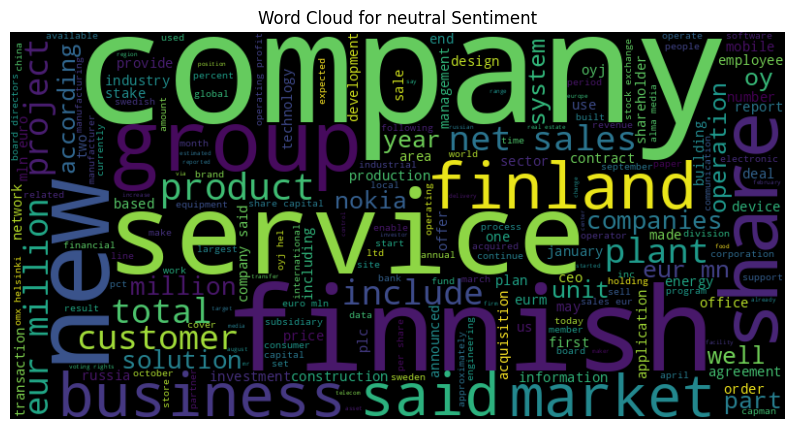

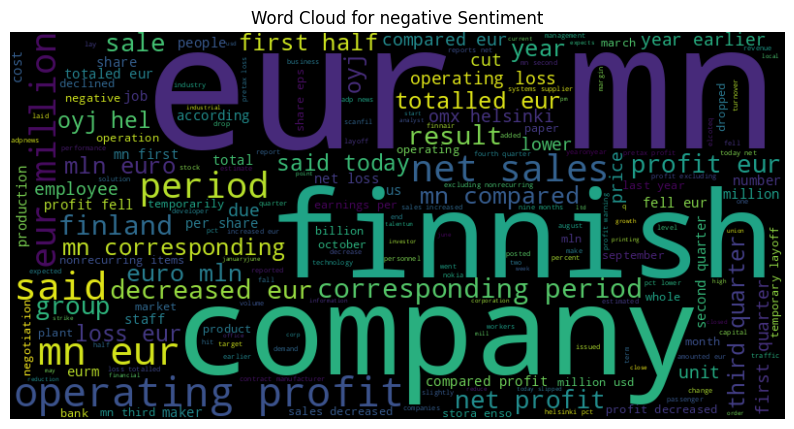

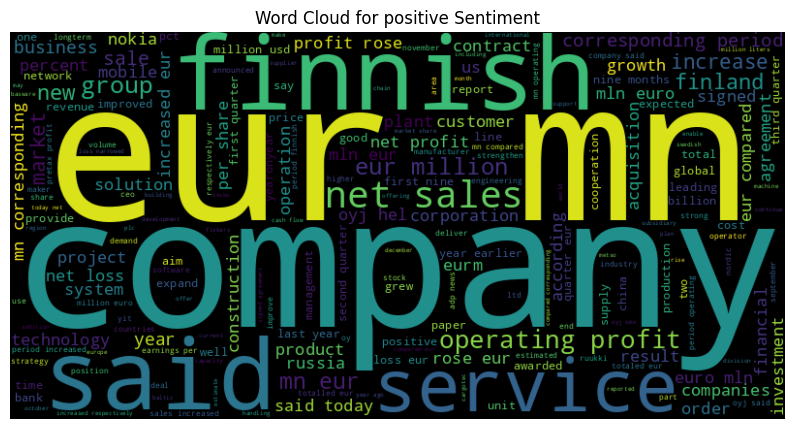

In [59]:
# Create a word cloud for each sentiment category
sentiment_categories = df['sentiment'].unique()
for sentiment in sentiment_categories:
    text_for_sentiment = " ".join(df[df['sentiment'] == sentiment]['news_title'])
    wordcloud = WordCloud(width=800, height=400).generate(text_for_sentiment)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis("off")
    plt.show()

In [60]:
# sentiment  = {'positive': 0,'neutral': 1,'negative':2} 
# 
# df['sentiment'] = [sentiment[item] for item in df['sentiment']] 

In [61]:
df

,sentiment,news_title,text_length
0,neutral,according gran company plans move production r...,76
1,neutral,technopolis plans develop stages area less squ...,141
2,negative,international electronic industry company elco...,176
3,positive,new production plant company would increase ca...,158
4,positive,according company updated strategy years baswa...,122
...,...,...,...
4841,negative,london marketwatch share prices ended lower lo...,113
4842,neutral,rinkuskiai beer sales fell per cent million li...,103
4843,negative,operating profit fell eur mn eur mn including ...,70
4844,negative,net sales paper segment decreased eur mn secon...,142


In [62]:
# Split the data into features (X) and labels (y)
X = df["news_title"]
y = df["sentiment"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer and transform the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [63]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [64]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [65]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.06      0.12       110
     neutral       0.69      0.98      0.81       571
    positive       0.67      0.34      0.45       289

    accuracy                           0.69       970
   macro avg       0.78      0.46      0.46       970
weighted avg       0.72      0.69      0.62       970


Confusion Matrix:
[[  7  65  38]
 [  0 560  11]
 [  0 191  98]]


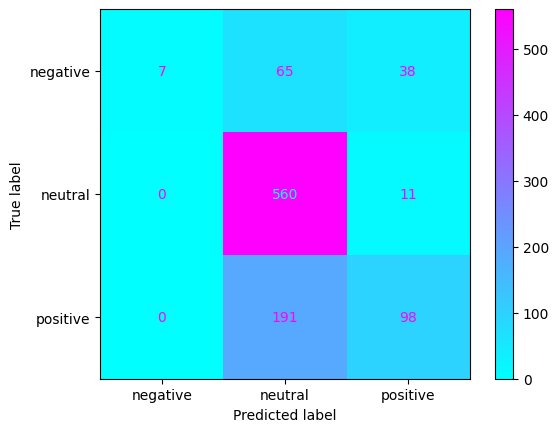

In [71]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap='cool')
plt.show()

In [72]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can experiment with different kernels and hyperparameters

# Train the classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_tfidf)

In [79]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.52      0.59       110
     neutral       0.75      0.92      0.83       571
    positive       0.76      0.49      0.60       289

    accuracy                           0.75       970
   macro avg       0.74      0.65      0.67       970
weighted avg       0.75      0.75      0.74       970


Confusion Matrix:
[[ 57  42  11]
 [ 10 528  33]
 [ 15 131 143]]


In [80]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.01, 0.1, 1]      # Kernel coefficient (only for some kernels)
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [78]:
# Print the best parameters
print("Best Parameters:")
print(best_params)

# Use the best estimator for prediction
y_pred = best_estimator.predict(X_test_tfidf)

Best Parameters:
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}


In [82]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression()

In [83]:
y_pred = logistic_regression.predict(X_test_tfidf)

In [84]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.45      0.58       110
     neutral       0.73      0.96      0.83       571
    positive       0.82      0.45      0.58       289

    accuracy                           0.75       970
   macro avg       0.79      0.62      0.67       970
weighted avg       0.77      0.75      0.73       970


Confusion Matrix:
[[ 49  51  10]
 [  2 550  19]
 [  8 150 131]]
